In [10]:
# CS1-b Get Metrics
import numpy as np
from sklearn.metrics import confusion_matrix

def get_metrics(actual_targets, predicted_targets, labels):
    
    c_matrix = confusion_matrix(actual_targets, predicted_targets, labels)
    
    return c_matrix

actual = ['cat', 'cat', 'cat', 'cat', 'bird', 'bird','bird','bird']
predicted = ['cat', 'cat', 'bird', 'bird', 'cat', 'bird', 'bird', 'bird']
labels = ['bird', 'cat']
print(get_metrics(actual, predicted, labels))

[[3 1]
 [2 2]]


In [11]:
# CS1-c Get Metrics
import numpy as np
from sklearn.metrics import confusion_matrix

def get_metrics(actual_targets, predicted_targets, labels):
    
    c_matrix = confusion_matrix(actual_targets, predicted_targets, labels)
    
    # your code here
    
    records = c_matrix.sum()
    accuracy = (c_matrix[0,0] + c_matrix[1,1])/c_matrix.sum()
    sensitivity = c_matrix[1,1]/c_matrix[1,:].sum()
    fpr = c_matrix[0,1]/c_matrix[0,:].sum()
    
    output = {'confusion matrix': c_matrix,
              'total records': round(records, 3),
              'accuracy': round(accuracy, 3),
              'sensitivity': round(sensitivity, 3),
              'false positive rate': round(fpr, 3)}
    
    return output

In [12]:
# CS2 - Five Number Summary
import numpy as np

def five_number_summary(x):
    if len(x.shape) != 2:
        return None
    
    col = x.shape[1]
    out = []
    for i in range(col):
        row = x[:,[i]]
        summary = {'minimum': np.min(row),
                   'first quartile': np.percentile(row,25),
                   'median': np.median(row),
                   'third quartile': np.percentile(row,75),
                   'maximum': np.max(row)}
        out.append(summary)
        
    return out

In [13]:
# CS3 - Min/Max Normalisation
import numpy as np

def normalize_minmax(data):
    if len(data.shape) != 2:
        return None
    
    row, col = data.shape
    out = np.empty((row,0))
    
    for i in range(col):
        row = data[:,[i]]
        minimum = np.min(row)
        maximum = np.max(row)
        row -= minimum
        row /= (maximum-minimum)
        out = np.append(out,row, axis=1)
        
    return out

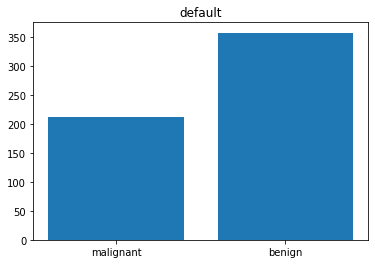

In [14]:
# plotting function
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np 

def display_bar_chart(positions, counts, names, title_name='default' ):
    plt.bar(positions, counts)
    plt.xticks(positions, names)
    plt.title(title_name)
    plt.show()
    
bunchobject = load_breast_cancer()

unique, counts = np.unique(bunchobject.target, return_counts = True )
display_bar_chart(unique, counts, bunchobject.target_names)

In [21]:
# CS4 - k-Nearest Neighbours model
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np 

def knn_classifier (bunchobject, feature_list, size, seed, k):
    #step 2
    data = bunchobject.data[:, feature_list]
    target = bunchobject.target
    target_names = bunchobject.target_names
    #step 3
    data_nm = normalize_minmax(data)

    #step 4
    data_train, data_test, target_train, target_test = train_test_split(data_nm, target, test_size=0.40, random_state=seed)
    
    #step 5 & 6
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(data_train, target_train)
    target_predicted = clf.predict(data_test)
    
    #step 7
    results = get_metrics(target_test, target_predicted, [0,1])
    
    return results

bunchobject = load_breast_cancer()

features = range( 20 )
results = knn_classifier(bunchobject, features, 0.40 , 2752 , 3 )
print(results)

{'confusion matrix': array([[ 73,   9],
       [  5, 141]]), 'total records': 228, 'accuracy': 0.939, 'sensitivity': 0.966, 'false positive rate': 0.11}


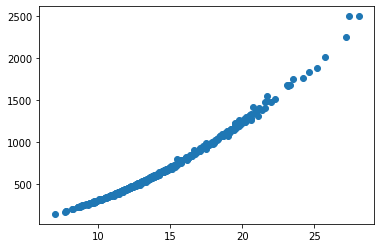

In [29]:
# plotting functions
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

def display_scatter(x,y, xlabel='x', ylabel='y',title_name ='default'):
    plt.scatter(x, y)
    plt.xlabel = xlabel
    plt.ylabel = ylabel
    plt.title = title_name
    plt.show()


def plot_linear_regression(x1, y1, x2, y2, x_label='', y_label=''):
    plt.scatter(x1,y1, color='black')
    plt.scatter(x2,y2, color='red')
    plt.xlabel = x_label
    plt.ylabel = y_label
    plt.show()

bunchobject = load_breast_cancer()

x_index = 0
y_index = 3
x = bunchobject.data[:,[x_index] ]
y = bunchobject.data[:,[y_index] ]
x_label = bunchobject.feature_names[x_index]
y_label = bunchobject.feature_names[y_index]
display_scatter(x,y,x_label,y_label)

{'coefficients': array([[100.16755386]]), 'intercept': array([-760.52027342]), 'mean squared error': 2631.2988797244757, 'r2 score': 0.9777253933521517}


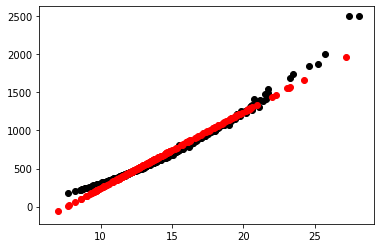

In [37]:
# CS5 - Linear Regression
import numpy as np
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

def linear_regression(bunchobject, x_index, y_index, size, seed):
    # step 2
    x = bunchobject.data[:,[x_index] ]
    y = bunchobject.data[:,[y_index] ]

    # step 3
    x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=size, random_state=seed)

    # step 4 & 5
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    
    # step 6
    coeff = regr.coef_
    intercept = regr.intercept_
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results = {'coefficients': coeff,
               'intercept': intercept,
               'mean squared error': mse,
               'r2 score': r2}

    return x_train, y_train, x_test, y_pred, results

bunchobject = load_breast_cancer()
x_train, y_train, x_test, y_pred, results = linear_regression(bunchobject,0,3,0.4,2752)
print(results)
plot_linear_regression(x_train, y_train, x_test, y_pred, bunchobject.feature_names[0],
bunchobject.feature_names[3])

{'coefficients': array([[-1.28141031e+02,  1.57502508e+01, -5.29186793e-01,
         7.97220165e-03]]), 'intercept': array([459.72265999]), 'mean squared error': 145.64415629913043, 'r2 score': 0.9987670855952097}


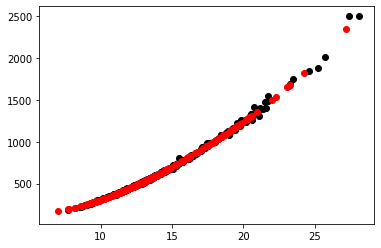

In [44]:
# CS6 - import numpy as np
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

def multiple_linear_regression(bunchobject, x_index, y_index, order, size, seed):
    
    #step 2
    x = bunchobject.data[:, [x_index]]
    y = bunchobject.data[:, [y_index]]
    
    #step 3
    poly = PolynomialFeatures(degree=order, include_bias=True)
    x_matrix = poly.fit_transform(x)
    
    x_matrix_train, x_matrix_test, y_train, y_test = train_test_split(x_matrix, y, test_size=size, random_state=seed)

    #step 4 & 5
    regr = linear_model.LinearRegression()
    regr.fit(x_matrix_train, y_train)
    y_pred = regr.predict(x_matrix_test)

    # step 6
    coeff = regr.coef_
    intercept = regr.intercept_
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results = {'coefficients': coeff[:,1:],
               'intercept': intercept,
               'mean squared error': mse,
               'r2 score': r2}

    return x_matrix_train[:,[1]], y_train, x_matrix_test[:,[1]], y_pred, results

bunchobject = load_breast_cancer()
x_train, y_train, x_test, y_pred, results = multiple_linear_regression(bunchobject,0,3,4,0.4,2752)
print(results)
plot_linear_regression(x_train, y_train, x_test, y_pred,
bunchobject.feature_names[0],
bunchobject.feature_names[3])

In [28]:
# CS7 - k-Nearest Neighbours (full)
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np 

def knn_classifier_full(bunchobject, feature_list, size, seed):
    #step 2
    data = bunchobject.data[:, feature_list]
    target = bunchobject.target
    target_names = bunchobject.target_names
    target_list = bunchobject.target
    
    #step 3
    data_nm = normalize_minmax(data)

    #step 4
    data_train, data_part2, target_train, target_part2 = train_test_split(data_nm, target, test_size=0.40, random_state=seed)

    data_val, data_test, target_val, target_test = train_test_split(data_part2, target_part2, test_size=0.50, random_state=seed)
    
    #step 5 & 6
    acc = list()
    for k in range(1,21):
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(data_train, target_train)
        target_val_pred = clf.predict(data_val)
        val_result = get_metrics(target_val, target_val_pred, [1, 0])
        acc.append(val_result['accuracy'])

    max_acc = max(acc)
    best_k = acc.index(max_acc) + 1
    
    #step 7
    clf = KNeighborsClassifier(n_neighbors=best_k)
    clf.fit(data_train, target_train)
    target_test_pred = clf.predict(data_test)
    target_val_pred = clf.predict(data_val)

    test_results = get_metrics(target_test, target_test_pred, [1, 0])
    val_results = get_metrics(target_val, target_val_pred, [1, 0])

    results = {'best k': best_k,
               'validation set': val_results,
               'test set': test_results}
    
    return results

bunchobject = load_breast_cancer()
features = range(20)
results = knn_classifier_full(bunchobject, features, 0.40 , 2752)

print(results)

{'best k': 4, 'validation set': {'confusion matrix': array([[71,  2],
       [ 2, 39]]), 'total records': 114, 'accuracy': 0.965, 'sensitivity': 0.951, 'false positive rate': 0.027}, 'test set': {'confusion matrix': array([[69,  4],
       [ 1, 40]]), 'total records': 114, 'accuracy': 0.956, 'sensitivity': 0.976, 'false positive rate': 0.055}}
